# Переобучение

Википедия: <br>"<b>Переобучение</b> (переподгонка, пере- в значении «слишком», англ. overfitting) в машинном обучении и статистике — явление, когда построенная модель хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах, не участвовавших в обучении (на примерах из тестовой выборки)."

<img src="../imgs/overfitting1.JPG" width=600>
<img src="../imgs/overfitting2.JPG" width=600>
<img src="../imgs/overfitting3.JPG" width=600>
<img src="../imgs/overfitting4.JPG" width=600>

<br>
<img src="../imgs/overfitting.png" align=left>
<img src="../imgs/overfitting2.png">

# Решающее дерево в задаче регрессии

In [7]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.tree import DecisionTreeRegressor

def create_random_dataset(function):
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    
    if function == 'sin':
        y = np.sin(X).ravel()
    if function == 'piecewise':
        y = np.piecewise(X.flatten(), [X.flatten() < 3, X.flatten() >= 3], [-1, 1]).ravel()
    
    y[::2] += 1 * (0.5 - rng.rand(40))
    
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    return X, y, X_test

print(X)
print(y)
print(X_test)

X, y, X_test = create_random_dataset('sin')

[[5.71874087e-04]
 [9.14413867e-02]
 [9.68347894e-02]
 [1.36937966e-01]
 [1.95273916e-01]
 [2.49767295e-01]
 [2.66812726e-01]
 [4.25221057e-01]
 [4.61692974e-01]
 [4.91734169e-01]
 [5.11672144e-01]
 [5.16130033e-01]
 [6.50142861e-01]
 [6.87373521e-01]
 [6.96381736e-01]
 [7.01934693e-01]
 [7.33642875e-01]
 [7.33779454e-01]
 [8.26770986e-01]
 [8.49152098e-01]
 [9.31301057e-01]
 [9.90507445e-01]
 [1.02226125e+00]
 [1.05814058e+00]
 [1.32773330e+00]
 [1.40221996e+00]
 [1.43887669e+00]
 [1.46807074e+00]
 [1.51166286e+00]
 [1.56712089e+00]
 [1.57757816e+00]
 [1.72780364e+00]
 [1.73882930e+00]
 [1.98383737e+00]
 [1.98838418e+00]
 [2.07027994e+00]
 [2.07089635e+00]
 [2.08511002e+00]
 [2.08652401e+00]
 [2.09597257e+00]
 [2.10553813e+00]
 [2.23946763e+00]
 [2.45786580e+00]
 [2.57444556e+00]
 [2.66582642e+00]
 [2.67948203e+00]
 [2.69408367e+00]
 [2.79344914e+00]
 [2.87058803e+00]
 [2.93277520e+00]
 [2.94652768e+00]
 [3.31897323e+00]
 [3.35233755e+00]
 [3.39417766e+00]
 [3.42609750e+00]
 [3.432504

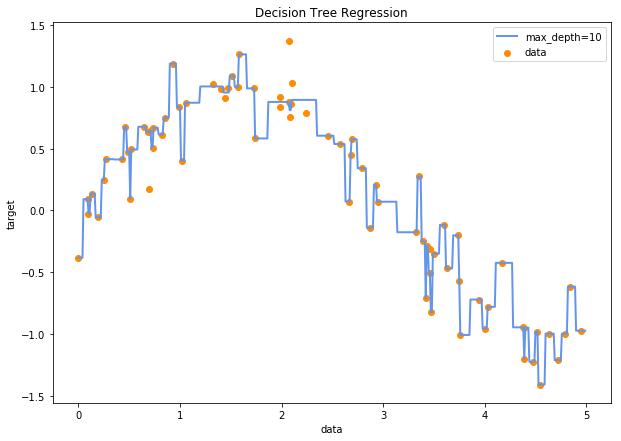

In [9]:
def fit_predict_plot(max_depth=10, mse_tree=True, mae_tree=False):
    clf = DecisionTreeRegressor(max_depth=max_depth,
                                random_state=1)
    clf.fit(X, y)
    plt.figure(figsize=(10, 7))
    plt.scatter(X, y, c="darkorange", label="data")
    y_pred = clf.predict(X_test) 
    plt.plot(X_test, y_pred, color="cornflowerblue", 
             label='max_depth=' + str(max_depth), linewidth=2)
    
    if mae_tree:
        clf2 = DecisionTreeRegressor(max_depth=max_depth, 
                                     criterion='mae',
                                     random_state=1)
        clf2.fit(X, y)
        y_pred2 = clf2.predict(X_test)
        plt.plot(X_test, y_pred2, color="green", label='max_depth=' + str(max_depth), linewidth=2)
    
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()
    

fit_predict_plot(max_depth=10)

## Дерево можно нарисовать: 

In [5]:
import pydotplus 
from IPython.display import Image
from sklearn import tree

clf = DecisionTreeRegressor(max_depth=10)
clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                 filled=True, rounded=True,
                                 special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

NameError: name 'X' is not defined

## Выводы:
- Регулируя max_depth можно находить компромисс между underfitting и overfitting
- Дерево – это жадный алгоритм, а значит его построение и качество сильно зависит от того, удачно ли были выбраны сплиты в начале построения
- В стандартной реализации для задачи регрессии вам доступны функции MAE, MSE. Но вы можете найти реализации, где функцию ошибки можно задать произвольным образом
- Дерево – интерпретируемый алгоритм (пока оно не очень глубокое)

## Ссылки:
- Википедия: <a href="https://en.wikipedia.org/wiki/Decision_tree_learning">"Decision tree learning"</a>
- <a href="http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart">Различия разных подходов к построению дерева</a>. Самое важное: "scikit-learn uses an optimised version of the CART algorithm".
- <a href="http://cis-linux1.temple.edu/~giorgio/cis587/readings/id3-c45.html">Статья</a> "Building Classification Models: ID3 and C4.5" 